In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

In [4]:
# Display basic info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
# Display first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
#missing values present in each column 
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

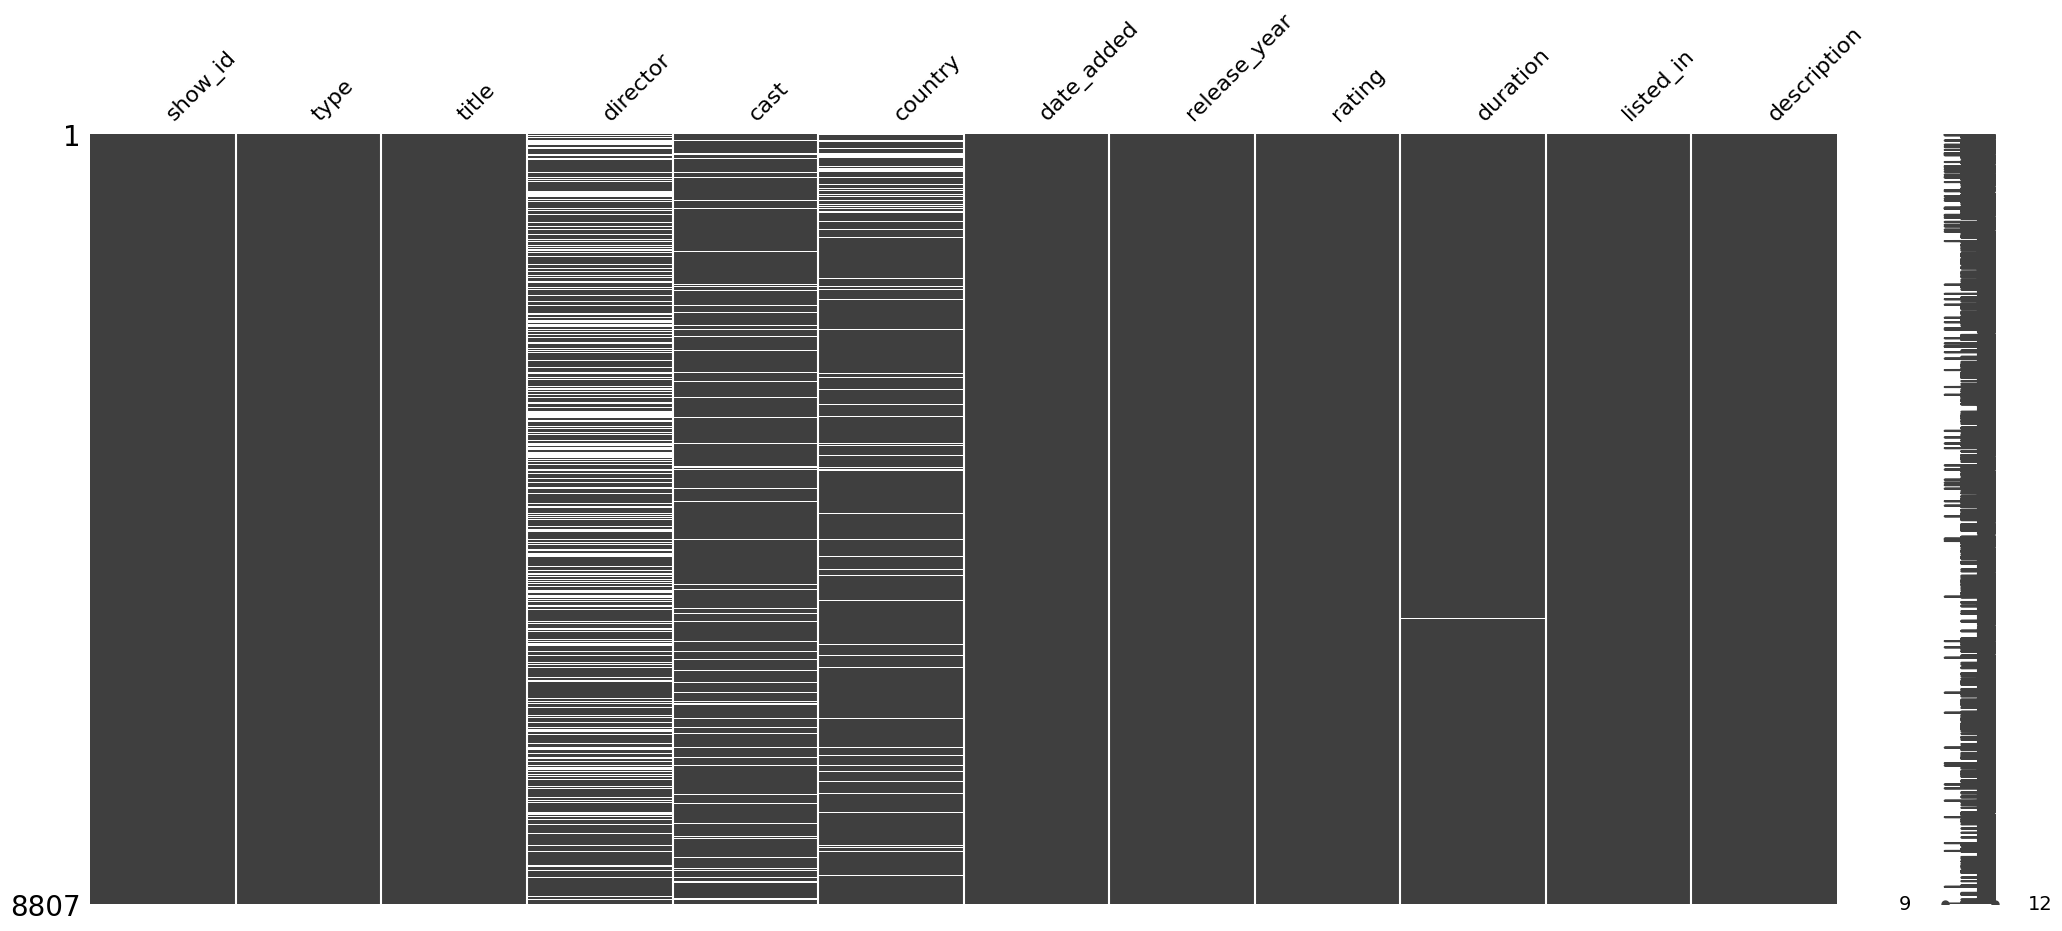

In [8]:
# Display the missing values matrix
msno.matrix(df)

# CLEANING THE DATASET !

In [14]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [15]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Visualize the Data

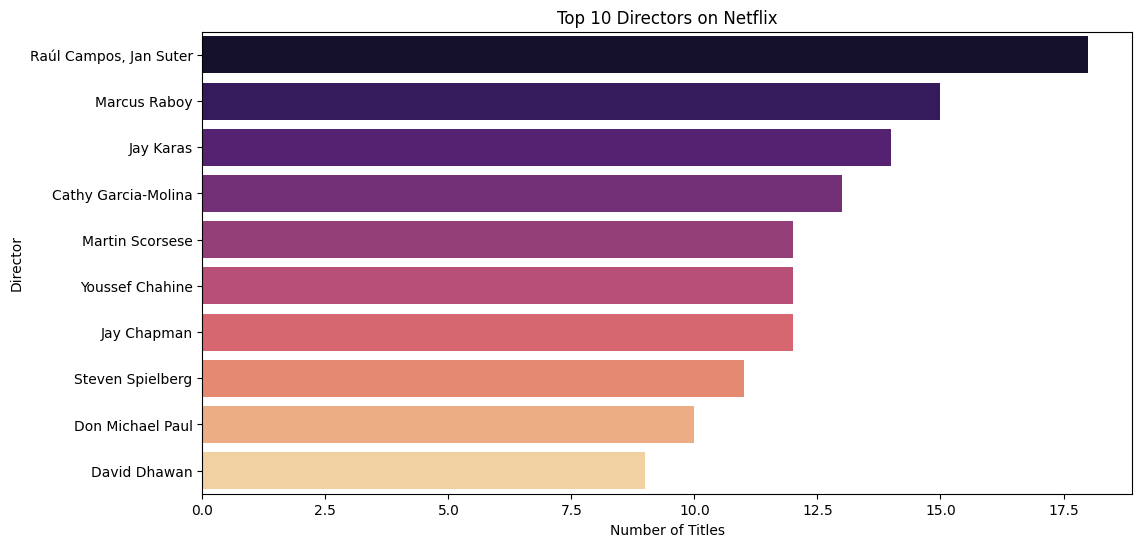

In [16]:
# Top Directors
plt.figure(figsize=(12, 6))
top_directors = df['director'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

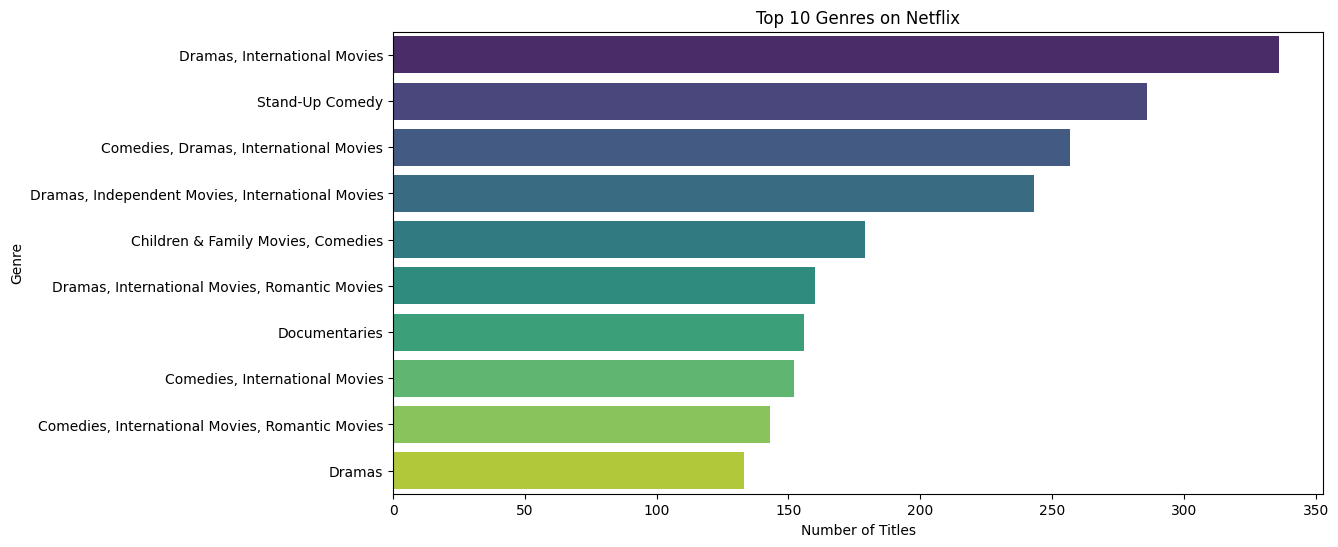

In [17]:
#  Top 10 Genres
plt.figure(figsize=(12, 6))
top_genres = df['listed_in'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

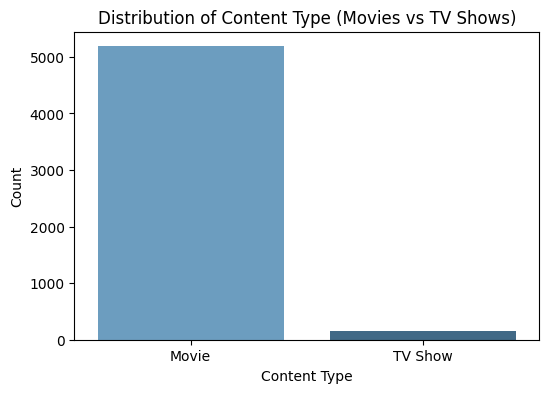

In [18]:
# Count the distribution of Movies vs TV Shows
content_type = df['type'].value_counts()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=content_type.index, y=content_type.values, palette="Blues_d")
plt.title('Distribution of Content Type (Movies vs TV Shows)')
plt.ylabel('Count')
plt.xlabel('Content Type')
plt.show()

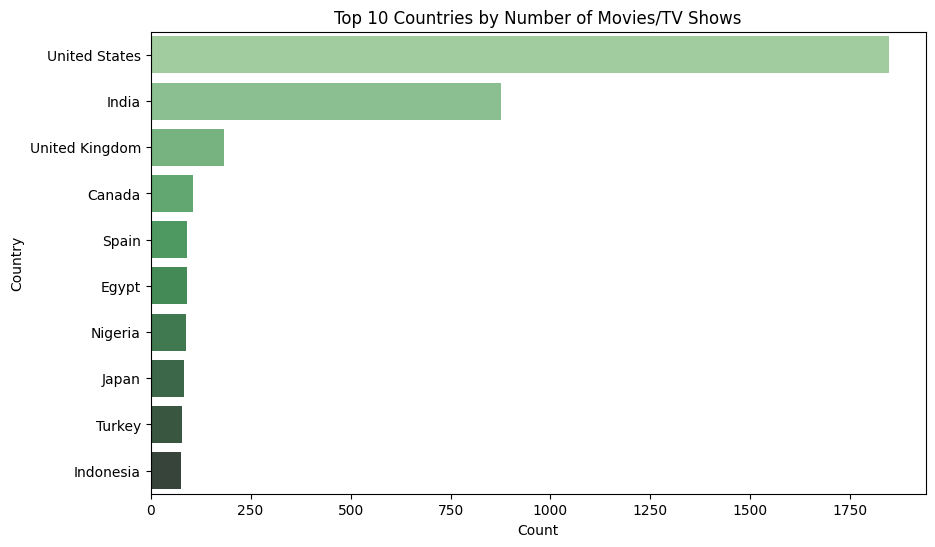

In [19]:
# Count the number of movies/TV shows by country
top_countries = df['country'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="Greens_d")
plt.title('Top 10 Countries by Number of Movies/TV Shows')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

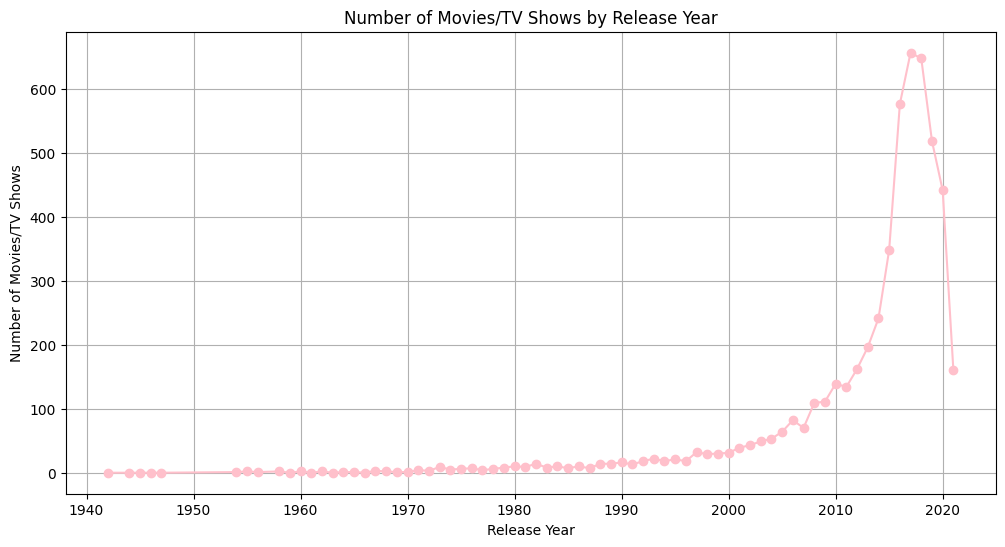

In [22]:
# Count content by release year
release_year_distribution = df['release_year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12,6))
plt.plot(release_year_distribution.index, release_year_distribution.values, marker='o', linestyle='-', color='pink')
plt.title('Number of Movies/TV Shows by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies/TV Shows')
plt.grid(True)
plt.show()


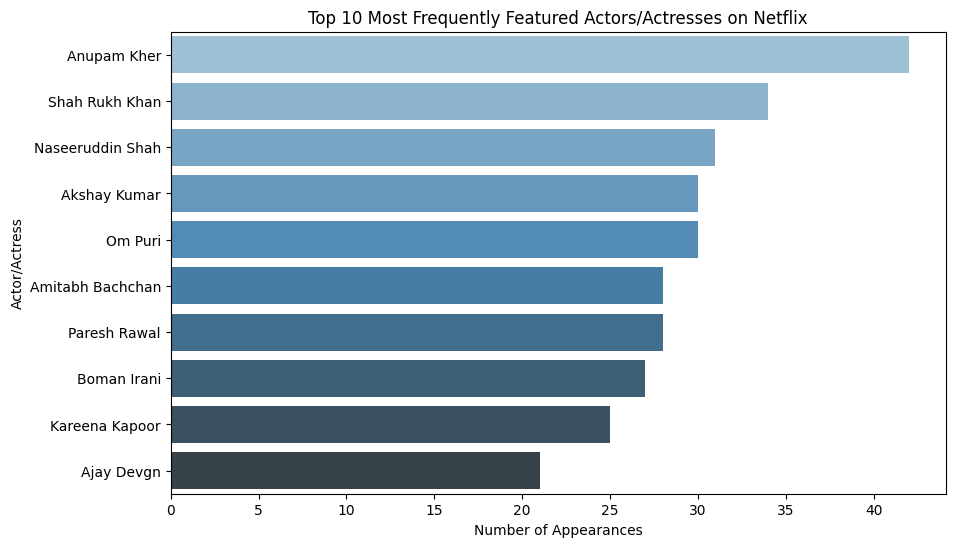

In [25]:
# Split 'cast' into individual actors and explode
df['cast'] = df['cast'].str.split(', ')
cast_exploded = df.explode('cast')

# Count appearances of actors
top_actors = cast_exploded['cast'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(y=top_actors.index, x=top_actors.values, palette="Blues_d")
plt.title('Top 10 Most Frequently Featured Actors/Actresses on Netflix')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor/Actress')
plt.show()


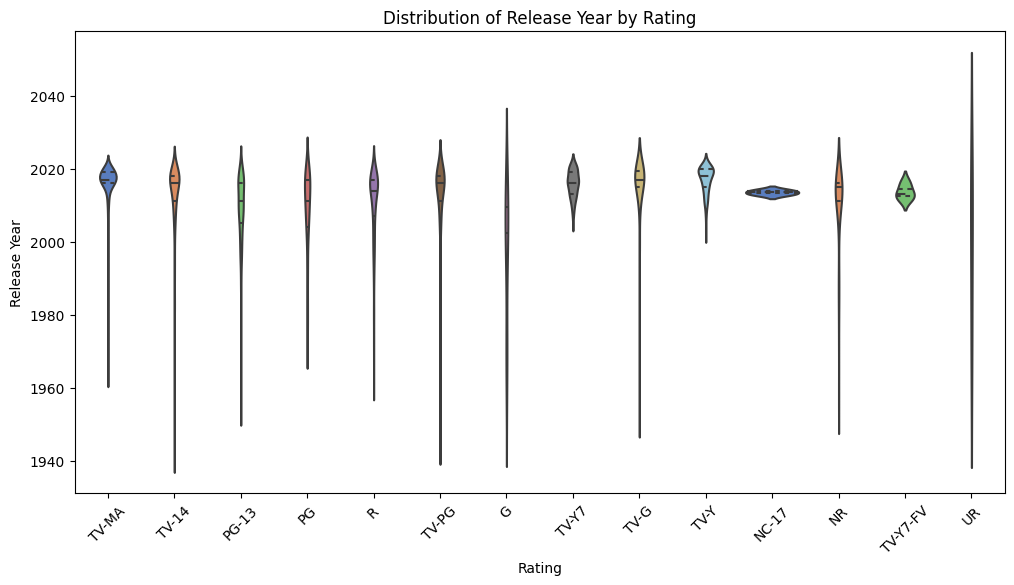

In [27]:
# Plot the distribution of release year for each rating
plt.figure(figsize=(12,6))
sns.violinplot(x='rating', y='release_year', data=df, palette='muted', inner='quartile')
plt.title('Distribution of Release Year by Rating')
plt.xlabel('Rating')
plt.ylabel('Release Year')
plt.xticks(rotation=45)
plt.show()
